# Lab 2 

*Name:* **Sajan Sahikarmi**<br>
*Roll No:*` KCE080BCT035`<br>
*Date:* **27/05/2025** 
## Objectives:

- Understand solution of Non linear Equations 
- Implement solution of non linear equations with Python and related libraries



## 1. Bisection Method (The Non-Algo Table Shortcut)

Root: 1.587890625


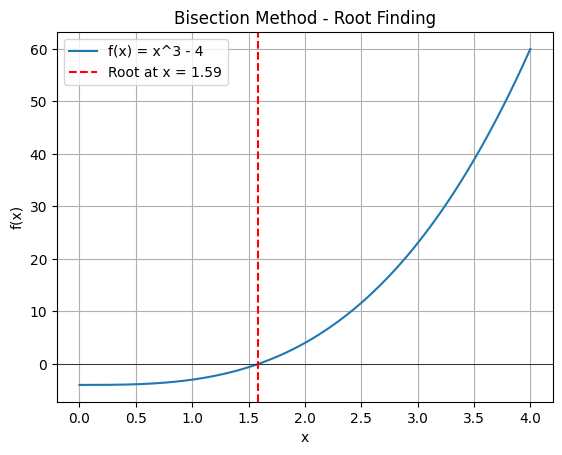

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from cmath import sin
%matplotlib inline

def my_bisection(f, a, b, tol):
    """
    Approximates a root, R, of the function f bounded by a and b to within tolerance tol.

    Arguments:
    f -- Function whose root we are trying to find
    a -- Left boundary of the interval
    b -- Right boundary of the interval
    tol -- Tolerance value for stopping the iteration

    Returns:
    R -- Approximate root
    """
    # Check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The scalars a and b do not bound a root")

    # Compute midpoint
    m = (a + b) / 2

    # Stopping condition, report m as root if f(m) is within tolerance
    if np.abs(f(m)) < tol:
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # Case where m is an improvement on a. Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # Case where m is an improvement on b. Make recursive call with b = m
        return my_bisection(f, a, m, tol)

def f(x):
    return x**3 - 4

# Bisection Method
root = my_bisection(f, 1, 3, 0.01)
print("Root:", root)

# Plotting the function and the root
x_vals = np.linspace(0, 4, 400)
y_vals = [f(x) for x in x_vals]

plt.plot(x_vals, y_vals, label="f(x) = x^3 - 4")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(root, color='r', linestyle='--', label=f'Root at x = {root:.2f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bisection Method - Root Finding')
plt.legend()
plt.grid(True)
plt.show()


## 2.Secant Method


Root: 1.5865729937694886


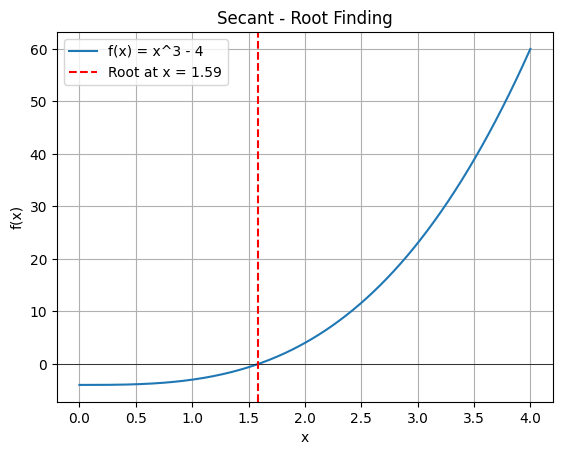

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from cmath import sin
%matplotlib inline

def Secant(f, a, b, tol):
    # Check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The scalars a and b do not bound a root")

    # Compute midpoint
    m = b- (f(b)*(b-a))/(f(b)-f(a))

    # Stopping condition, report m as root if f(m) is within tolerance
    if np.abs(f(m)) < tol:
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # Case where m is an improvement on a. Make recursive call with a = m
        return Secant(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # Case where m is an improvement on b. Make recursive call with b = m
        return Secant(f, a, m, tol)

def f(x):
    return x**3 - 4

# Bisection Method
root = Secant(f, 1, 3, 0.01)
print("Root:", root)

# Plotting the function and the root
x_vals = np.linspace(0, 4, 400)
y_vals = [f(x) for x in x_vals]

plt.plot(x_vals, y_vals, label="f(x) = x^3 - 4")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(root, color='r', linestyle='--', label=f'Root at x = {root:.2f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Secant - Root Finding')
plt.legend()
plt.grid(True)
plt.show()


## 3. Newton Raphson 


Root: 1.5874179569870934


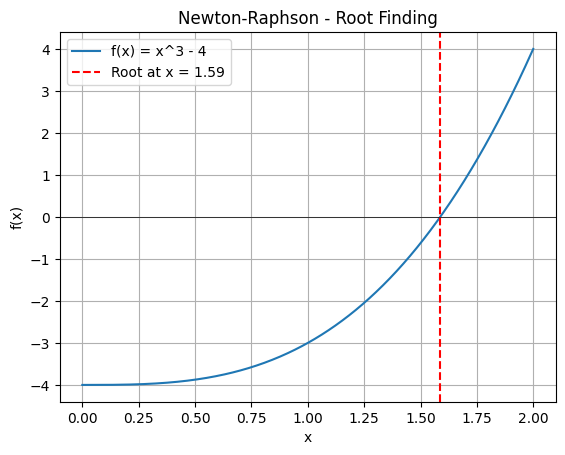

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return x**3 - 4

def df(x):
    return 3 * x**2

# Newton-Raphson Method
def newton_raphson(f, df, x0, tol):
    max_iter = 100
    iter_count = 0
    while abs(f(x0)) > tol and iter_count < max_iter:
        x0 = x0 - f(x0) / df(x0)
        iter_count += 1
    return x0

# Initial guess and tolerance
x0 = 1.5
tol = 0.01

# Find root
root = newton_raphson(f, df, x0, tol)
print("Root:", root)

# Plotting
x_vals = np.linspace(0, 2, 400)
y_vals = [f(x) for x in x_vals]

plt.plot(x_vals, y_vals, label="f(x) = x^3 - 4")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(root, color='r', linestyle='--', label=f'Root at x = {root:.2f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton-Raphson - Root Finding')
plt.legend()
plt.grid(True)
plt.show()


## 4. Newton Raphson for system of non linear equations


Approximate solution: x = 1.931852, y = 0.517638


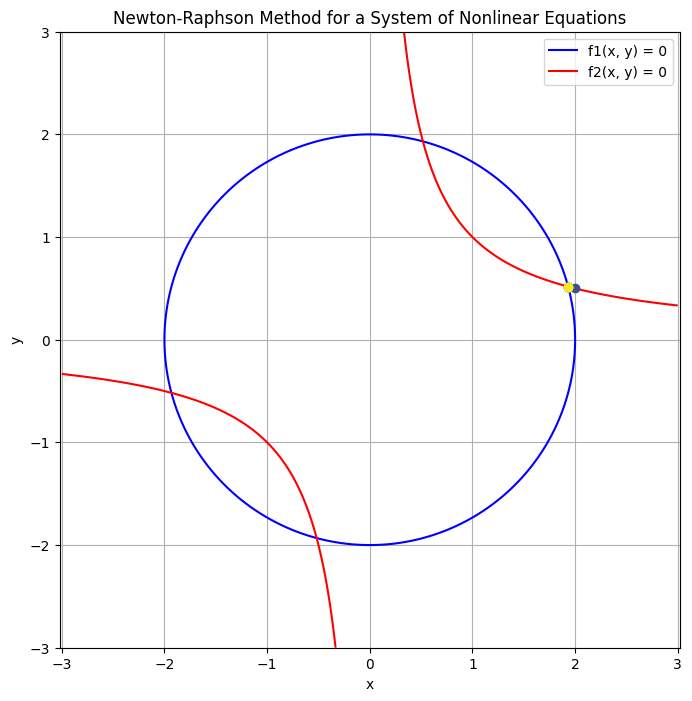

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.lines as mlines

# System of equations: F(x, y)
def F(X):
    x, y = X
    return np.array([
        x**2 + y**2 - 4,    # Circle: radius 2
        x * y - 1           # Hyperbola
    ])

# Jacobian matrix of the system
def J(X):
    x, y = X
    return np.array([
        [2*x, 2*y],
        [y, x]
    ])

# Newton-Raphson for systems
def newton_raphson_system(F, J, x0, tol=1e-6, max_iter=20):
    X = np.array(x0, dtype=float)
    path = [X.copy()]

    for i in range(max_iter):
        Fx = F(X)
        Jx = J(X)

        try:
            delta = np.linalg.solve(Jx, -Fx)
        except np.linalg.LinAlgError:
            print("Jacobian is singular. Cannot proceed.")
            break

        X += delta
        path.append(X.copy())

        if np.linalg.norm(Fx, ord=2) < tol:
            break

    return np.array(path)

# Plot the system and iteration path
def plot_system(F, path):
    x_vals = np.linspace(-3, 3, 400)
    y_vals = np.linspace(-3, 3, 400)
    X, Y = np.meshgrid(x_vals, y_vals)

    F1 = X**2 + Y**2 - 4      # f1
    F2 = X * Y - 1            # f2

    plt.figure(figsize=(8, 8))
    c1 = plt.contour(X, Y, F1, levels=[0], colors='blue', linewidths=1.5)
    c2 = plt.contour(X, Y, F2, levels=[0], colors='red', linewidths=1.5)

    # Plot iteration path
    colors = cm.viridis(np.linspace(0, 1, len(path)))
    for i in range(1, len(path)):
        plt.plot([path[i-1][0], path[i][0]], [path[i-1][1], path[i][1]],
                 color=colors[i], marker='o')

    # Labels and legend
    blue_line = mlines.Line2D([], [], color='blue', label='f1(x, y) = 0')
    red_line = mlines.Line2D([], [], color='red', label='f2(x, y) = 0')
    plt.legend(handles=[blue_line, red_line])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.title("Newton-Raphson Method for a System of Nonlinear Equations")
    plt.axis('equal')
    plt.show()

# Run the solver
x0 = [2.0, 0.5]  # Improved initial guess
path = newton_raphson_system(F, J, x0)

print(f"Approximate solution: x = {path[-1][0]:.6f}, y = {path[-1][1]:.6f}")
plot_system(F, path)


*Name:* **Sajan Sahikarmi**<br>
*Roll No:*` KCE080BCT035`<br>
*Date:* **27/05/2025** 
